In [1]:
# Install necessary libraries using pip if not already installed
# !pip install pandas seaborn matplotlib numpy scikit-learn statsmodels

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
import statsmodels.api as sm
from matplotlib.gridspec import GridSpec
#from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load data
data = pd.read_csv("breast_cancer.csv")

# Display structure and dimensions of the data
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
data.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


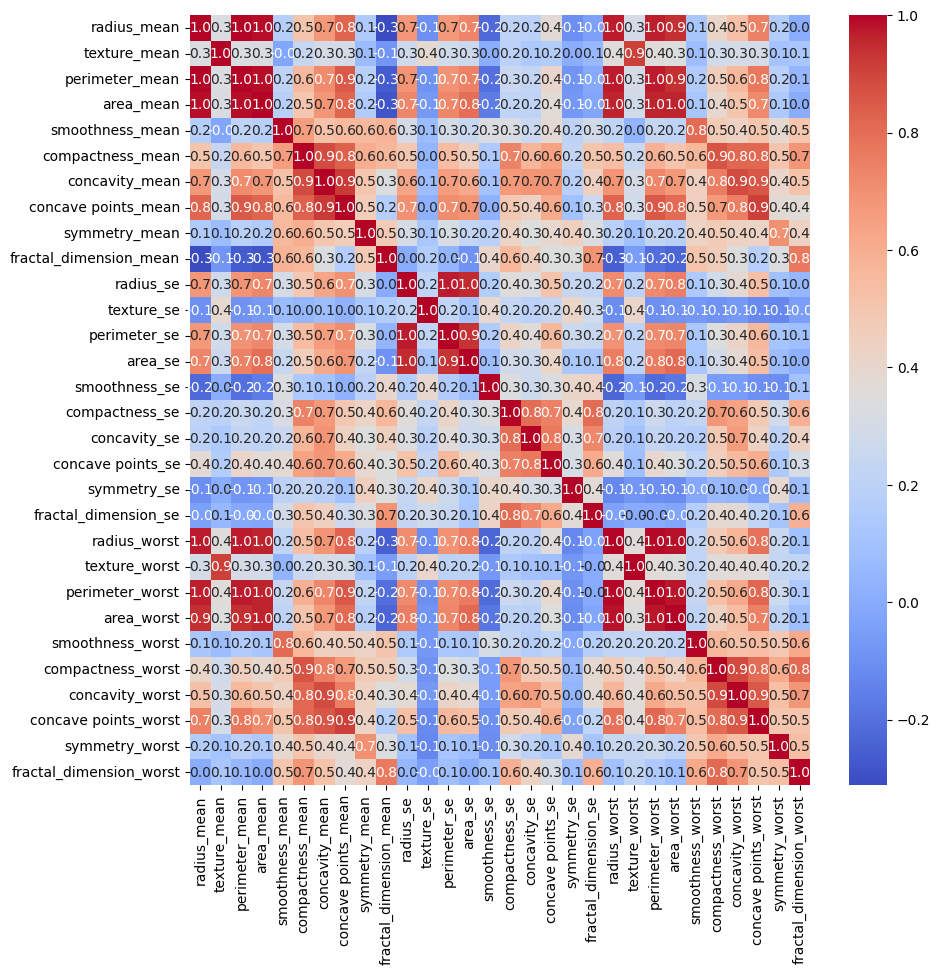

In [5]:
# Compute the correlation matrix
corr_mat = data.iloc[:, 2:].corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()


In [6]:
# Convert diagnosis column to a categorical type
data['diagnosis'] = pd.Categorical(data['diagnosis'])
print(data['diagnosis'].dtype)

# Optionally, relabel the diagnosis column
data['diagnosis'] = data['diagnosis'].cat.rename_categories(["B", "M"])
print(data['diagnosis'].dtype)

category
category


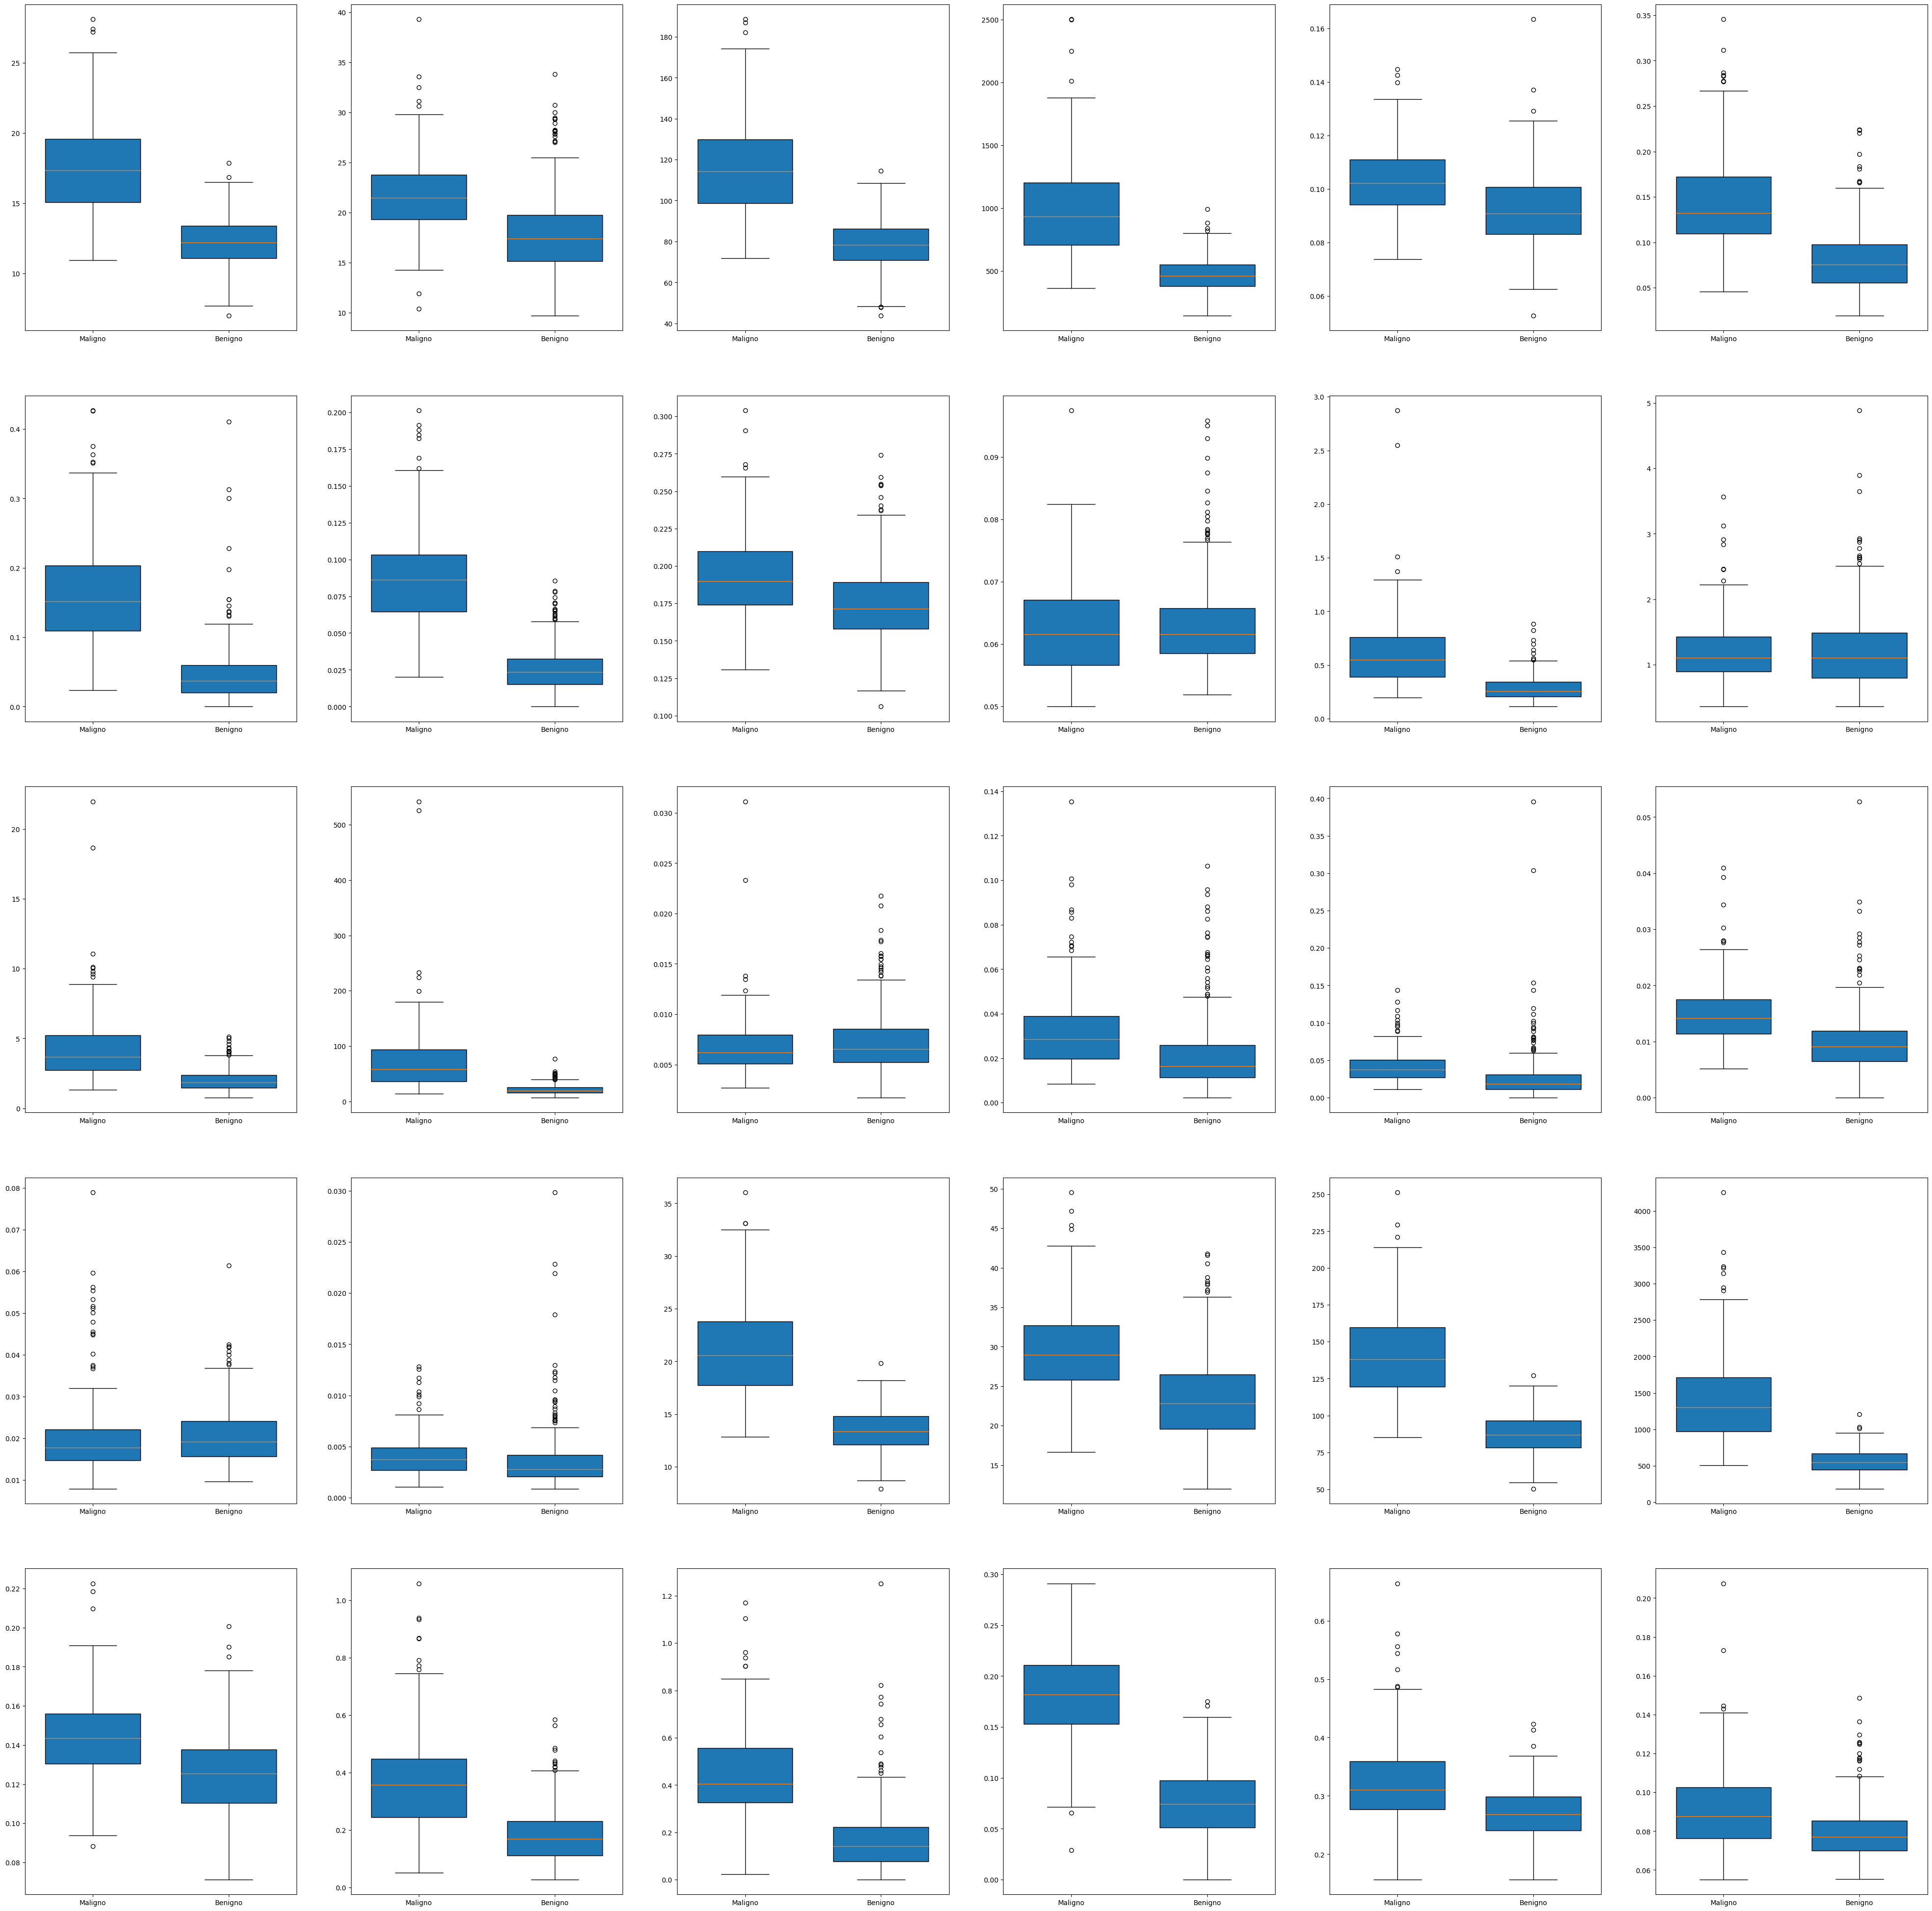

In [7]:
# Boxplots for each feature grouped by diagnosis
# LOLLO BLOCKKKK

num_colonne = data.shape[1]
plots_list = []

fig, axs = plt.subplots(5, 6, figsize=(50, 50))

for i in range(2, num_colonne):
    row = (i-2) // 6
    col = (i-2) % 6
    axs[row, col].boxplot(
        [data[data["diagnosis"] == "M"].iloc[:, i], data[data["diagnosis"] == "B"].iloc[:, i]], 
        positions=[1, 2], 
        widths=0.7,
        patch_artist=True,
        labels=["Maligno", "Benigno"]
    )

In [8]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


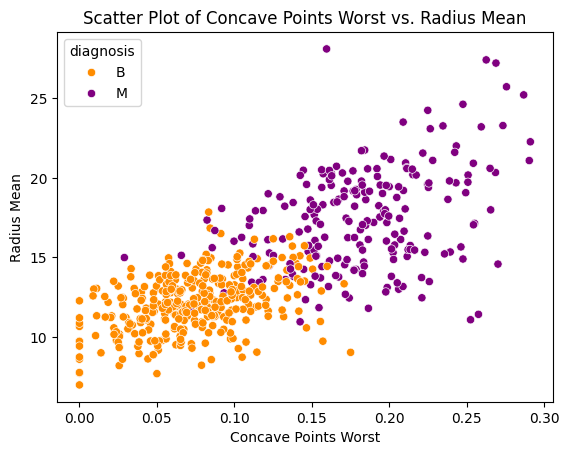

In [9]:
palette = {'B': 'darkorange', 'F': 'cyan4', 'M': 'purple'}  # Add all unique values to the palette dictionary
sns.scatterplot(data=data, x='concave points_worst', y='radius_mean', hue='diagnosis', palette=palette)

# Add labels and title
plt.xlabel('Concave Points Worst')
plt.ylabel('Radius Mean')
plt.title('Scatter Plot of Concave Points Worst vs. Radius Mean')

# Display the plot
plt.show()

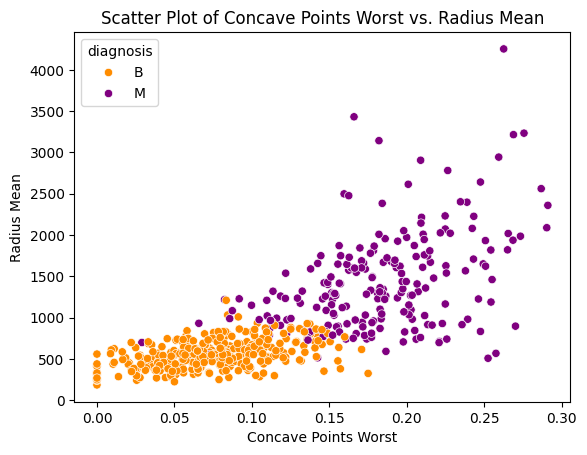

In [10]:
palette = {'B': 'darkorange', 'F': 'cyan4', 'M': 'purple'}  # Add all unique values to the palette dictionary
sns.scatterplot(data=data, x='concave points_worst', y='area_worst', hue='diagnosis', palette=palette)

# Add labels and title
plt.xlabel('Concave Points Worst')
plt.ylabel('Radius Mean')
plt.title('Scatter Plot of Concave Points Worst vs. Radius Mean')

# Display the plot
plt.show()

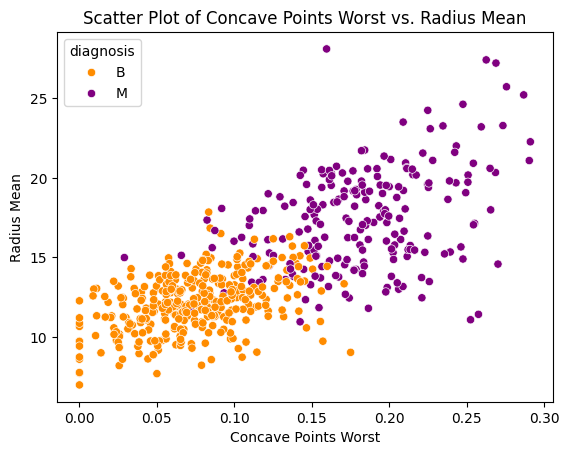

In [11]:
palette = {'B': 'darkorange', 'F': 'cyan4', 'M': 'purple'}  # Add all unique values to the palette dictionary
sns.scatterplot(data=data, x='concave points_worst', y='radius_mean', hue='diagnosis', palette=palette)

# Add labels and title
plt.xlabel('Concave Points Worst')
plt.ylabel('Radius Mean')
plt.title('Scatter Plot of Concave Points Worst vs. Radius Mean')

# Display the plot
plt.show()

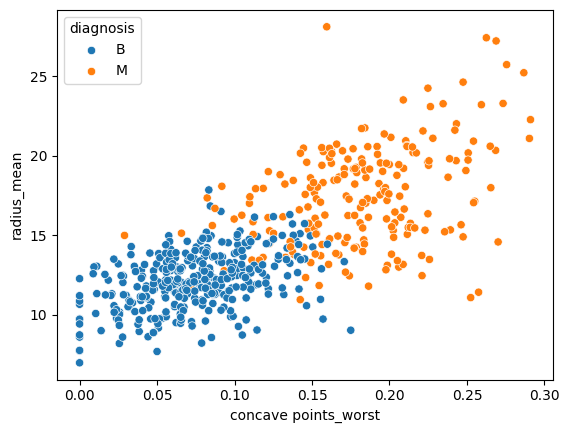

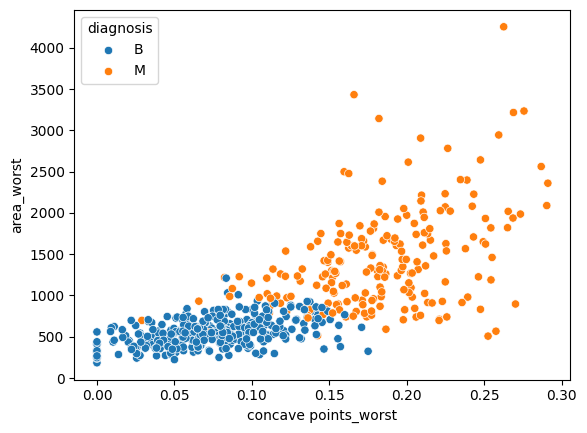

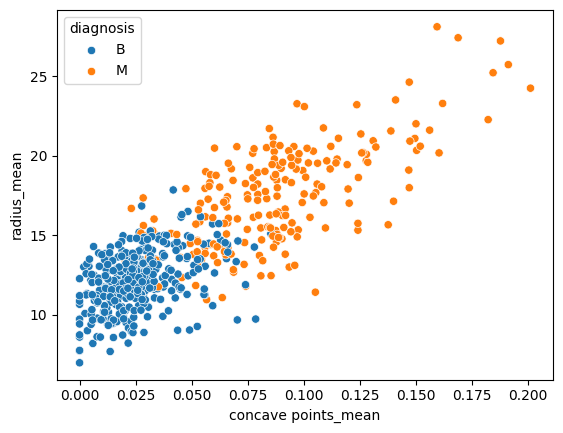

In [12]:
# Scatter plot examples
sns.scatterplot(x='concave points_worst', y='radius_mean', hue='diagnosis', data=data)
plt.show()

sns.scatterplot(x='concave points_worst', y='area_worst', hue='diagnosis', data=data)
plt.show()

sns.scatterplot(x='concave points_mean', y='radius_mean', hue='diagnosis', data=data)
plt.show()

In [13]:
##### NUOVA COLONNA PER CALIBRATION

# Converte i valori di y_test da 'B' e 'M' a 0 e 1
y_binary = np.array([0 if char == 'B' else 1 for char in data['diagnosis']])

# Aggiungere la colonna
data['diagnosisBin'] = y_binary

##### FINE NUOVA COLONNA

# Split data into train, test and validation
train, test = train_test_split(data, test_size=0.25, random_state=2)

# Separate the features and target variable for training
X_train = train[['radius_mean', 'concave points_mean']]
y_train = train['diagnosis']

# Separate the features and target variable for testing
X_test = test[['radius_mean', 'concave points_mean']]
y_test = test['diagnosis']

SAMPLE SIZE

In [14]:
# Dimensione del dataset
n = 569

# Calcola il numero di casi positivi (Maligno)
num_positivi = data['diagnosisBin'].sum()

# Calcola il numero totale di osservazioni
num_totale = len(data)

# Calcola la prevalenza
prevalenza = num_positivi / num_totale

# Numero di eventi (casi positivi)
n_eventi = n * prevalenza
print(f"Numero di eventi positivi attesi: {n_eventi}")

# Numero minimo di eventi necessari (regola di 10 eventi per variabile)
n_variabili = 2
min_eventi_necessari = 10 * n_variabili
print(f"Numero minimo di eventi necessari: {min_eventi_necessari}")

# Verifica se il numero di eventi attesi è sufficiente
if n_eventi >= min_eventi_necessari:
    print("La dimensione del campione è sufficiente per il modello di regressione logistica.")
else:
    print("La dimensione del campione non è sufficiente per il modello di regressione logistica.")

Numero di eventi positivi attesi: 212.0
Numero minimo di eventi necessari: 20
La dimensione del campione è sufficiente per il modello di regressione logistica.


### Logistic Regression

In [15]:
# Fit the model
log_reg = LogisticRegression(C=1e10, solver='liblinear')
log_reg.fit(X_train, y_train)

# Make predictions
pred_class = log_reg.predict(X_test)
pred_proba = log_reg.predict_proba(X_test)

# Evaluate the model performance
conf_matrix = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[77 10]
 [ 6 50]]


In [16]:
# Get coefficients
coeff = pd.DataFrame(log_reg.coef_.transpose(), index=['radius_mean', 'concave points_mean'], columns=['Coefficient'])
print(coeff)

                     Coefficient
radius_mean             0.737309
concave points_mean    92.884790


In [17]:
# Classification report
report = classification_report(y_test, pred_class, target_names=["B", "M"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.89      0.91        87
           M       0.83      0.89      0.86        56

    accuracy                           0.89       143
   macro avg       0.88      0.89      0.88       143
weighted avg       0.89      0.89      0.89       143



PLATT SCALING FOR CALIBRATION

In [18]:
# NEW MODEL FOR CALIBRATION

# Separate the features and target variable for training
X_train2 = train[['radius_mean', 'concave points_mean']]
y_train2 = train['diagnosisBin']

# Separate the features and target variable for testing
X_test2 = test[['radius_mean', 'concave points_mean']]
y_test2 = test['diagnosisBin']

# Fit the model
log_reg2 = LogisticRegression(C=1e10, solver='liblinear')
log_reg2.fit(X_train2, y_train2)

LogisticRegression(C=10000000000.0, solver='liblinear')

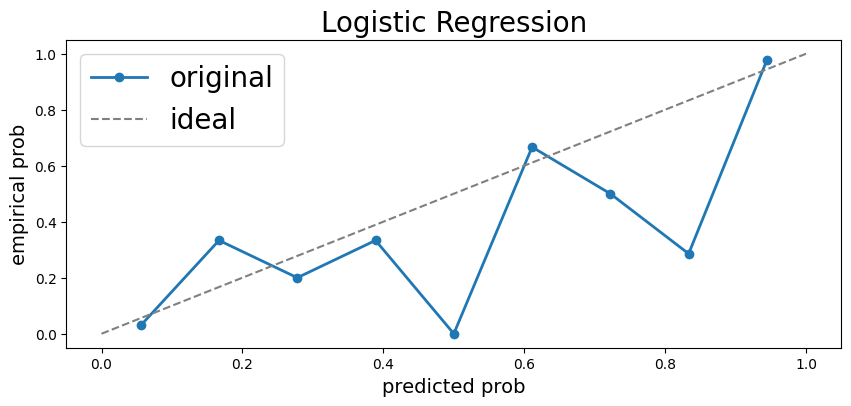

In [19]:
# predicted probabilities
pred_probs_test = log_reg2.predict_proba(X_test2)[:,1]
# space of probability with 10 intervals
pred_probs_space = np.linspace(pred_probs_test.min(), pred_probs_test.max(), 10)

empirical_probs = []
pred_probs_midpoints = []

# empirical probabilities and mid points
for i in range(len(pred_probs_space)-1):
    empirical_probs.append(np.mean(y_test2[(pred_probs_test > pred_probs_space[i]) & (pred_probs_test < pred_probs_space[i+1])]))
    pred_probs_midpoints.append((pred_probs_space[i] + pred_probs_space[i+1])/2)

# plotting
plt.figure(figsize=(10,4))
plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
plt.title('Logistic Regression', fontsize=20)
plt.xlabel('predicted prob', fontsize=14)
plt.ylabel('empirical prob', fontsize=14)
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.legend(['original', 'ideal'], fontsize=20)

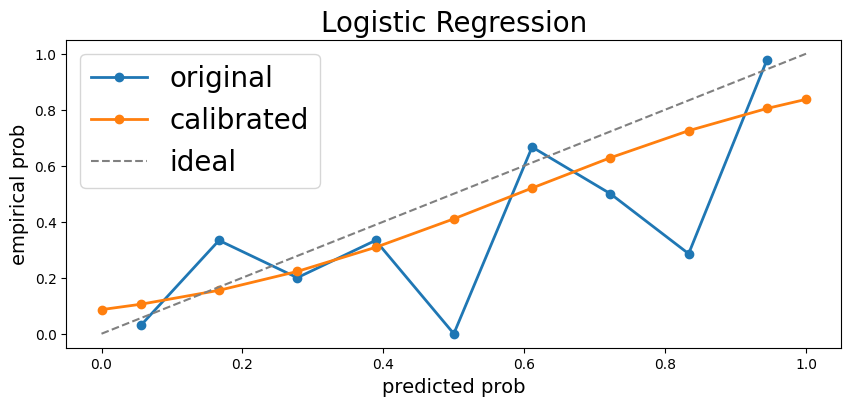

In [20]:
# we now create a new model using the predicted probabilites as input in order to calibrate the original probabilites predicted
lr_model = LogisticRegression()
lr_model.fit(pred_probs_test.reshape(-1,1), y_test2)

# calibrated probabilities
calibrated_probs = lr_model.predict_proba(np.array([0.0]+pred_probs_midpoints+[1.0]).reshape(-1,1))[:,1]
    
# plotting
plt.figure(figsize=(10,4))
plt.plot(pred_probs_midpoints, empirical_probs, linewidth=2, marker='o')
plt.title('Logistic Regression', fontsize=20)
plt.xlabel('predicted prob', fontsize=14)
plt.ylabel('empirical prob', fontsize=14)
plt.plot([0.0]+pred_probs_midpoints+[1.0], calibrated_probs, linewidth=2, marker='o')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.legend(['original', 'calibrated', 'ideal'], fontsize=20)

ODDS RATIO

In [21]:
# Estrarre i coefficienti dal modello addestrato
coefficients = log_reg2.coef_[0]

# Calcolare gli odds ratio esponenziando i coefficienti
odds_ratios = np.exp(coefficients)

# Creare un DataFrame per visualizzare i risultati
feature_names = ['radius_mean', 'concave points_mean']
odds_ratios_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

print(odds_ratios_df)

# OR > 1 -> un aumento di una unità nei features aumenta la probabilità dell'evento
# OR < 1 -> un aumento di una unità nei features diminuisce la probabilità dell'evento
# OR = 1 -> i features non hanno effetto sulla probabilità dell'evento

               Feature  Coefficient    Odds Ratio
0          radius_mean     0.737309  2.090304e+00
1  concave points_mean    92.884790  2.184499e+40


AUC-ROC CURVE

0.9690065681444991


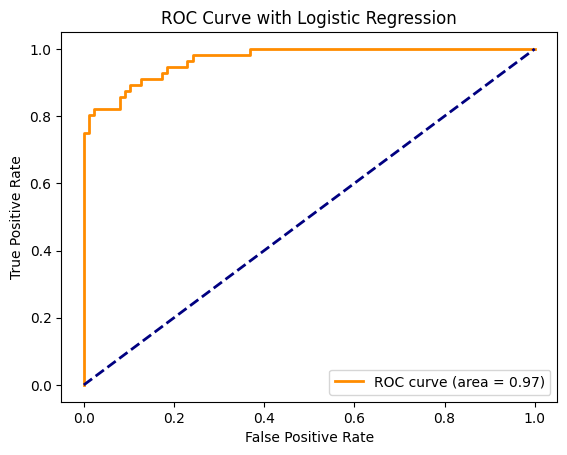

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC-ROC
auc = roc_auc_score(y_test2, log_reg2.predict_proba(X_test2)[:, 1])
print(auc)

# Calcolare il tasso di veri positivi e falsi positivi
fpr, tpr, thresholds = roc_curve(y_test2, pred_probs_test)

# Visualizzare la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Marginal effects

In [23]:
# marginal effects (misurano il cambiamento nella probabilità prevista dell'evento per una piccola variazione nella caratteristica)
"""""
import statsmodels.api as sm

log_reg_sm = sm.Logit(y_train2, sm.add_constant(X_train2)).fit()
marginal_effects = log_reg_sm.get_margeff()
print(marginal_effects.summary())
"""""

'""\nimport statsmodels.api as sm\n\nlog_reg_sm = sm.Logit(y_train2, sm.add_constant(X_train2)).fit()\nmarginal_effects = log_reg_sm.get_margeff()\nprint(marginal_effects.summary())\n'

Valori come il Relative Risk, Excess Risk e Attributable risk non necessitano di computazione in quanto discutono di cambiamenti nel risultato considerando una associazione tra quest'ultimo, ed una esposizione ad una caratteristica presente, tuttavia in questo dataset non sono presenti caratteristiche simili.

### Decision tree 3

In [24]:
from sklearn import tree
import matplotlib
import matplotlib.patches as mpatches

In [25]:
trees_train = train.drop(["diagnosis", "diagnosisBin"], axis=1)
trees_test = test.drop(["diagnosis", "diagnosisBin"], axis=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(trees_train, train["diagnosis"])

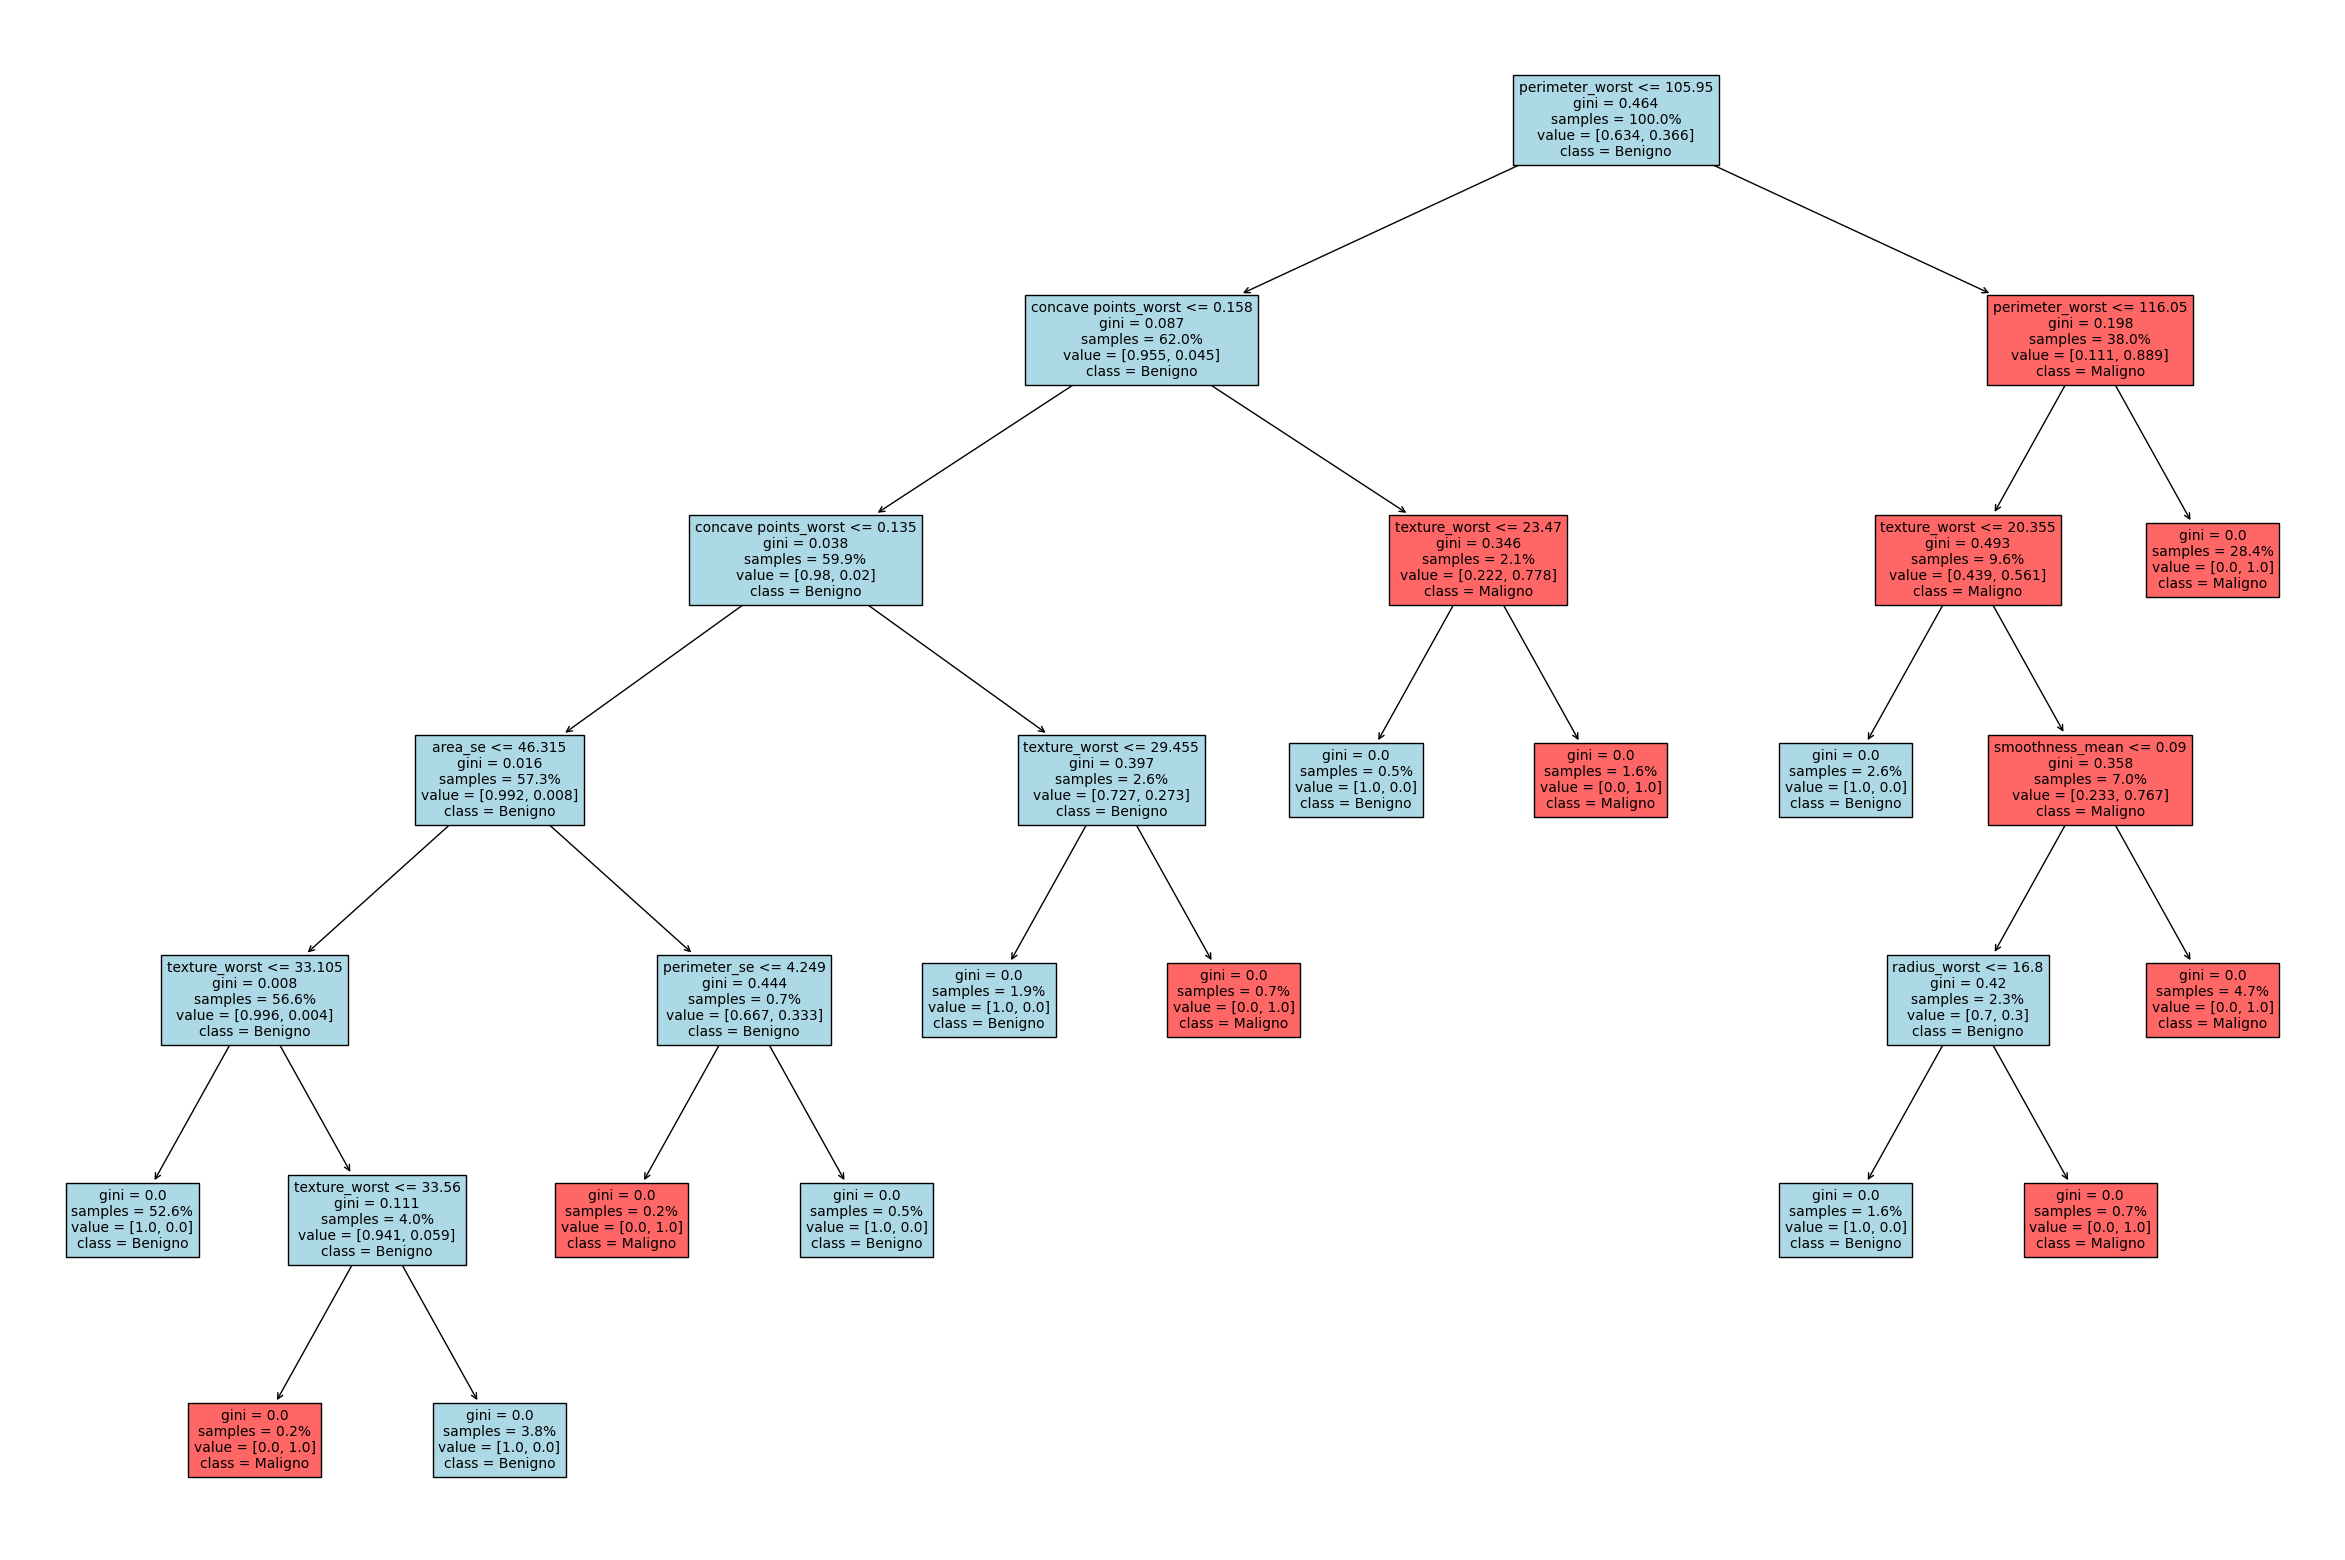

In [26]:
columns_names = data.columns.tolist()
benigno_label = "Benigno"
maligno_label = "Maligno"
benigno_color = "lightblue"
maligno_color = (1.0, 0.4, 0.4)
del columns_names[1]

tree.plot_tree(
  clf,
  feature_names=columns_names,
  class_names=[benigno_label, maligno_label],
  fontsize=10,
  filled=True,
  proportion=True,
)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)

for node in plt.gca().get_children():
  if isinstance(node, matplotlib.text.Annotation):
    if benigno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(benigno_color)
    if maligno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(maligno_color)


fig.savefig('tree.png')

In [27]:
predictions = clf.predict(trees_test)
acc = sum(predictions == test['diagnosis']) / len(predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.9300699300699301


### Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [29]:
rf = RandomForestClassifier()
rf = rf.fit(trees_train, train["diagnosis"])

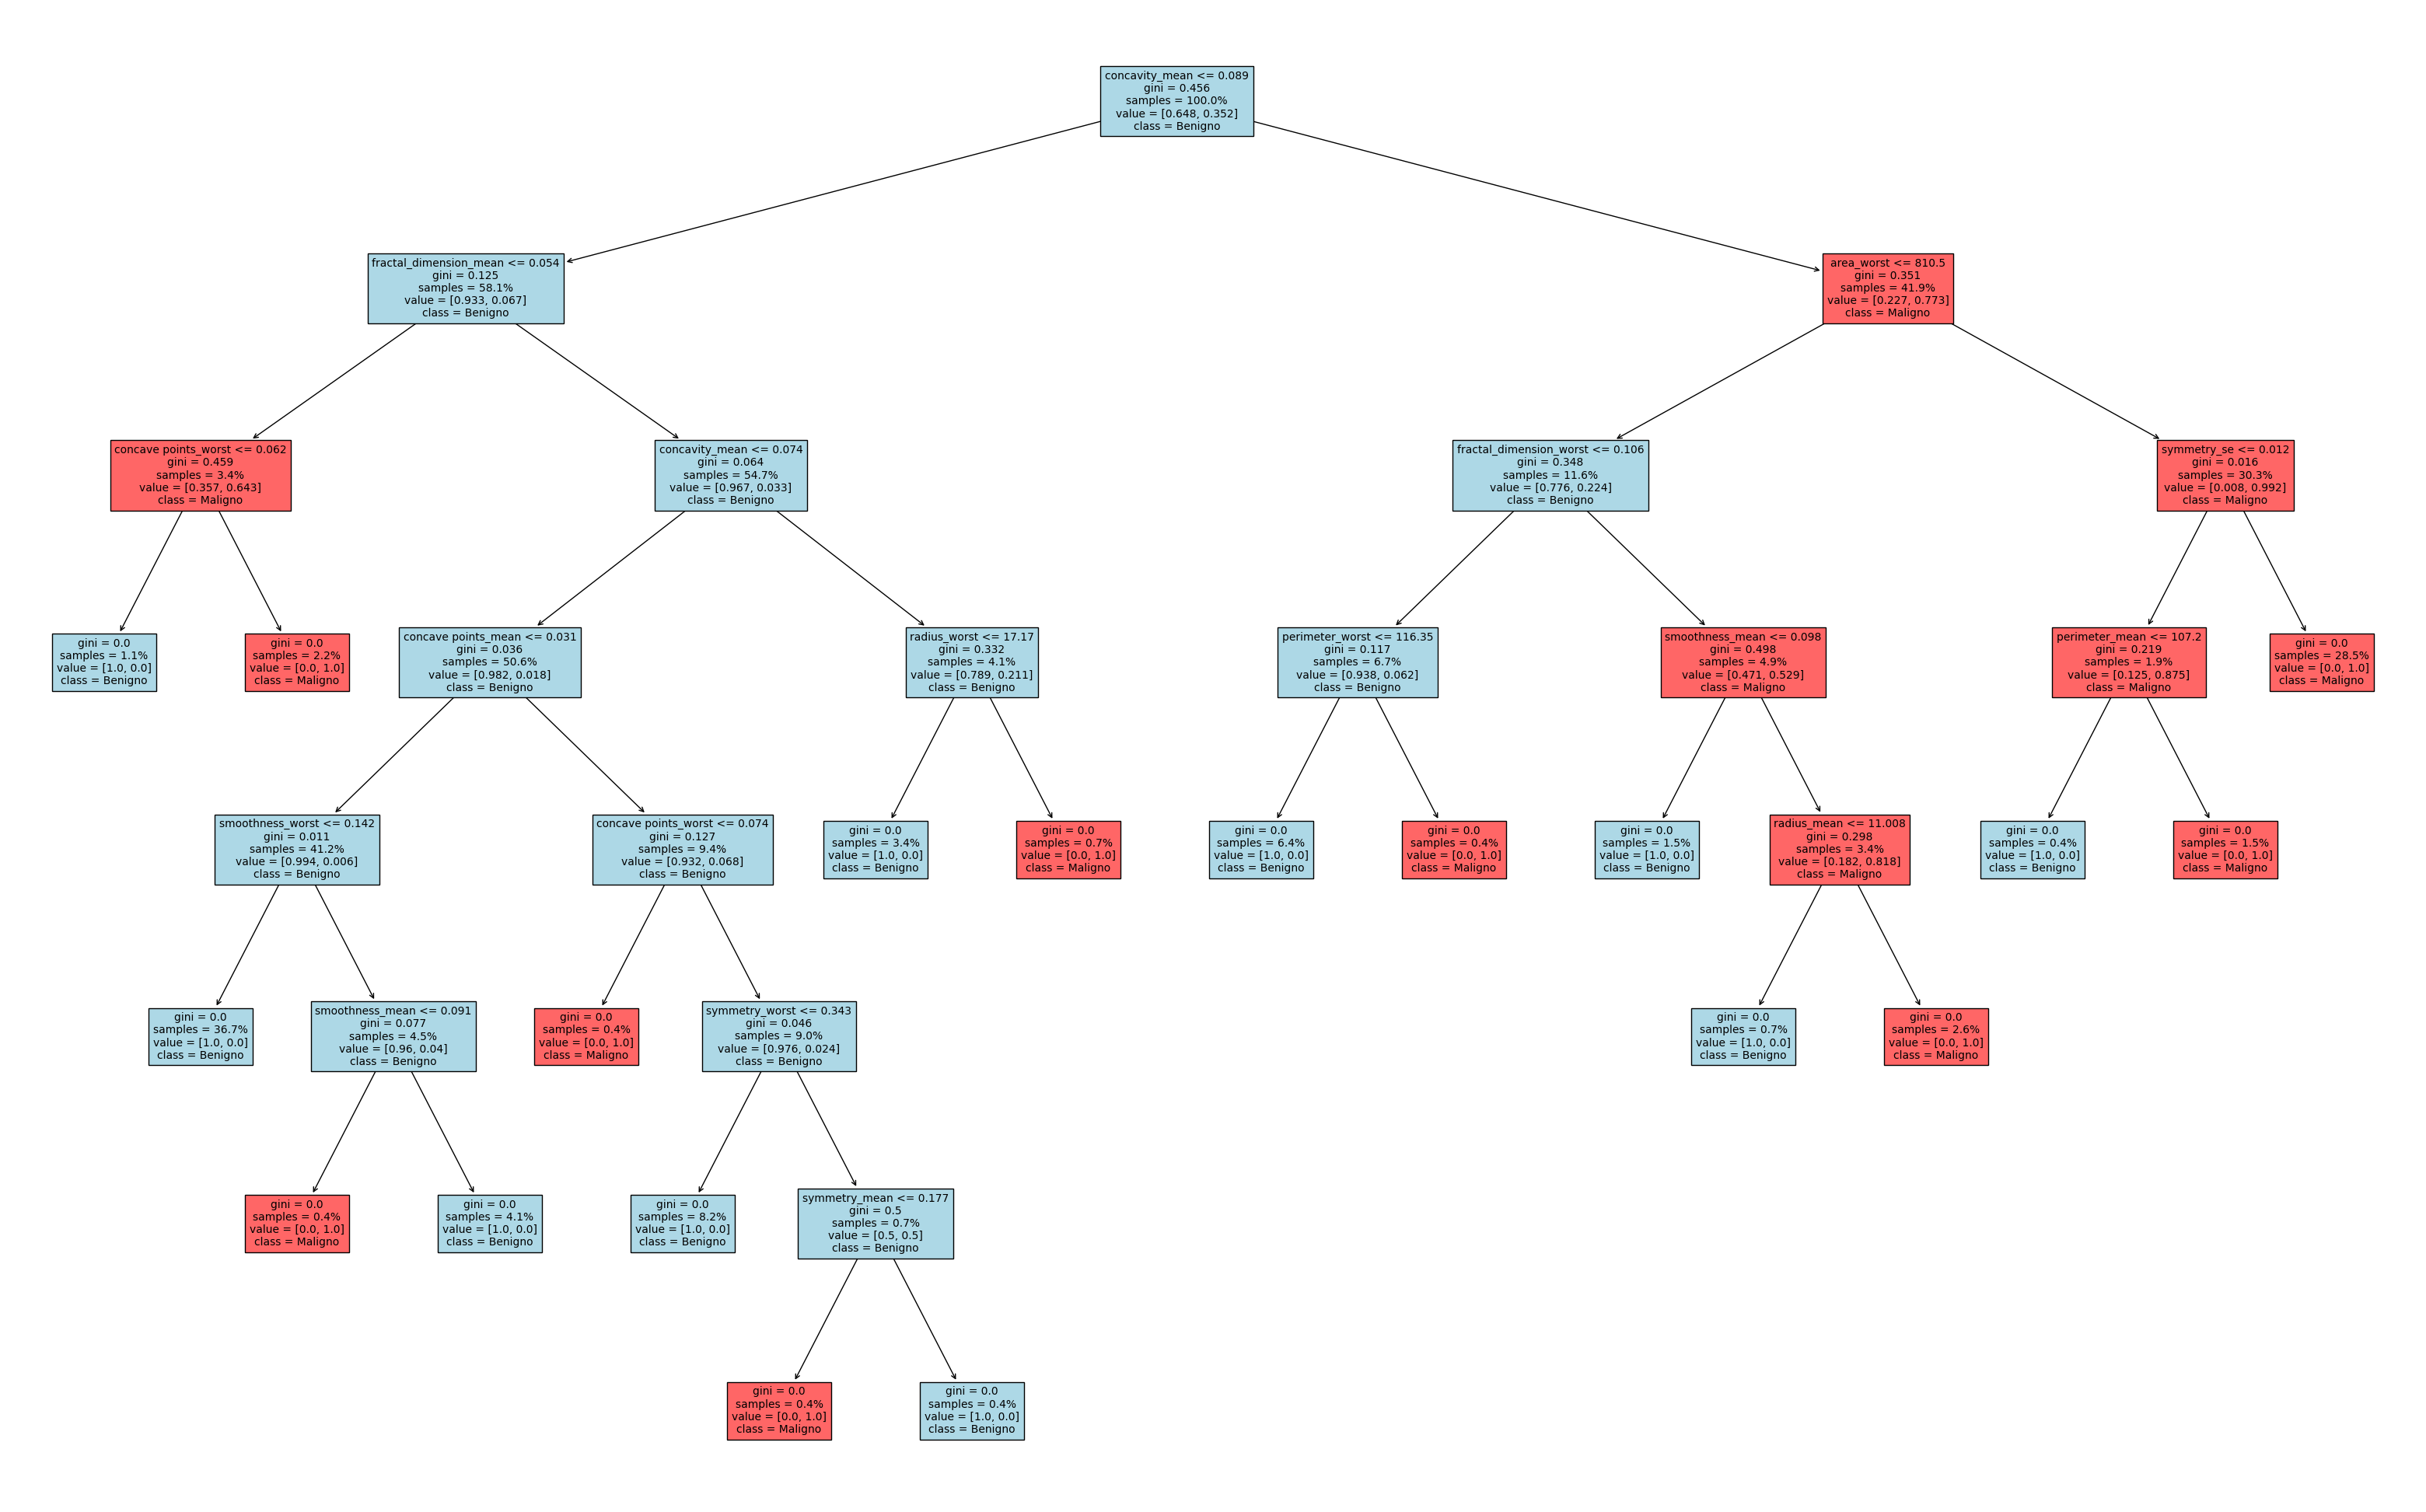

In [30]:
columns_names = data.columns.tolist()
estimator = rf.estimators_[0]

del columns_names[1]
plot_tree(
    estimator,
    feature_names=columns_names,
    class_names=["Benigno", "Maligno"],
    fontsize=10,
    filled=True,
    proportion=True,
)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(40, 25)

for node in plt.gca().get_children():
  if isinstance(node, matplotlib.text.Annotation):
    if benigno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(benigno_color)
    if maligno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(maligno_color)

plt.savefig('Random_forest.png')
plt.show()

In [31]:
predictions = rf.predict(trees_test)
acc = sum(predictions == test['diagnosis']) / len(predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.9300699300699301


### K Neighbors Classifier (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
knn_train_accuracy = []
knn_test_accuracy = []
knn_columns = ['texture_mean', 'area_mean']

for n_neighbors in range(2, 100):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn = knn.fit(train[knn_columns], train["diagnosis"])
  knn_predictions = knn.predict(train[knn_columns])
  knn_train_accuracy.append(sum(knn_predictions == train['diagnosis']) / len(train['diagnosis']))
  knn_predictions = knn.predict(test[knn_columns])
  knn_test_accuracy.append(sum(knn_predictions == test['diagnosis']) / len(test['diagnosis']))
  

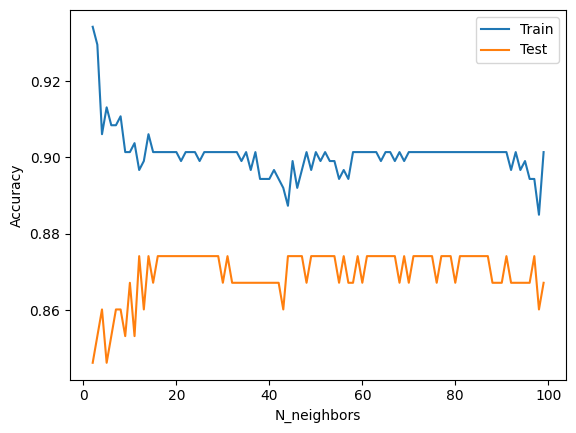

In [34]:
plt.plot(range(2, 100), knn_train_accuracy, label="Train")
plt.plot(range(2, 100), knn_test_accuracy, label="Test")
plt.xlabel("N_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [35]:
knn_train_accuracy = []
knn_test_accuracy = []

for n_neighbors in range(2, 100):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn = knn.fit(train[['concave points_worst', 'radius_mean']], train["diagnosis"])
  knn_predictions = knn.predict(train[['concave points_worst', 'radius_mean']])
  knn_train_accuracy.append(sum(knn_predictions == train['diagnosis']) / len(train['diagnosis']))
  knn_predictions = knn.predict(test[['concave points_worst', 'radius_mean']])
  knn_test_accuracy.append(sum(knn_predictions == test['diagnosis']) / len(test['diagnosis']))

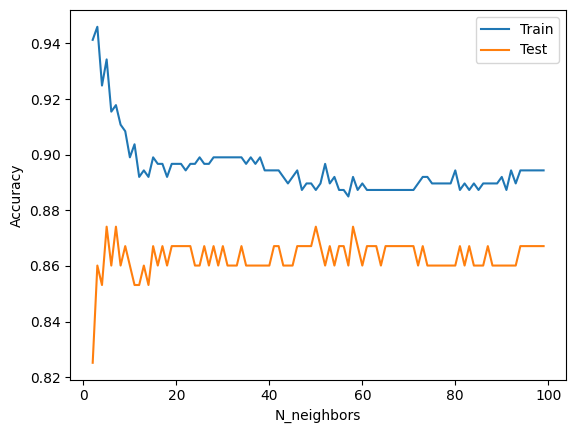

In [36]:
plt.plot(range(2, 100), knn_train_accuracy, label="Train")
plt.plot(range(2, 100), knn_test_accuracy, label="Test")
plt.xlabel("N_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [37]:
knn_accuracy = sum(knn_predictions == test['diagnosis']) / len(test['diagnosis'])
print(f"Accurcuracy: {knn_accuracy}")

Accurcuracy: 0.8671328671328671


### Support Vectors Classifier (SVC)

In [38]:
svc = LinearSVC()

parameters = {
    'penalty':['l2'],
    'C':[0.001, 0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 25, 30]
}
grid_search = GridSearchCV(svc, parameters)
grid_earch = grid_search.fit(X_train, y_train)
print(grid_search.best_params_, grid_search.best_score_)

{'C': 0.5, 'penalty': 'l2'} 0.9015047879616963


In [39]:
svc = LinearSVC(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'])
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [40]:
y_train_np = y_train.to_numpy()
y_train_np = np.where(y_train_np == 'B', 0, 1) # B --> 0, M --> 1 (needed for scatterplot colors)
y_train_np = y_train_np.reshape(-1,1)

In [41]:
w0, w1 = svc.coef_[0]
b = svc.intercept_[0]
accuracy = svc.score(X_test, y_test)
print(accuracy)

0.8811188811188811


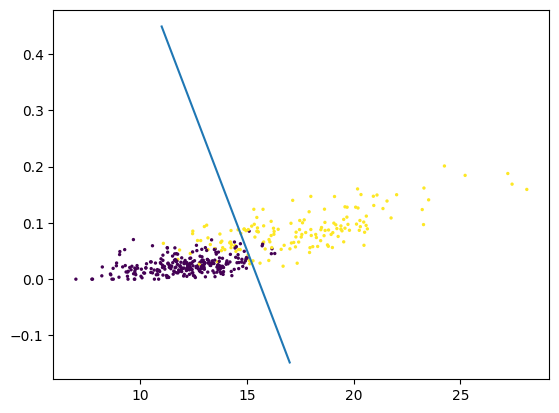

In [42]:
fig, ax = plt.subplots()

# separator Xs
x = np.linspace(11,17,2000).reshape(-1,1)

ax.scatter(X_train.loc[:, 'radius_mean'], X_train.loc[:, 'concave points_mean'], s=2, c=y_train_np)
ax.plot(x, -(w0/w1)*x - (b/w1))     # separator 
# ax.set_title('Train')
fig.show()

Text(0, 0.5, 'Frequency')

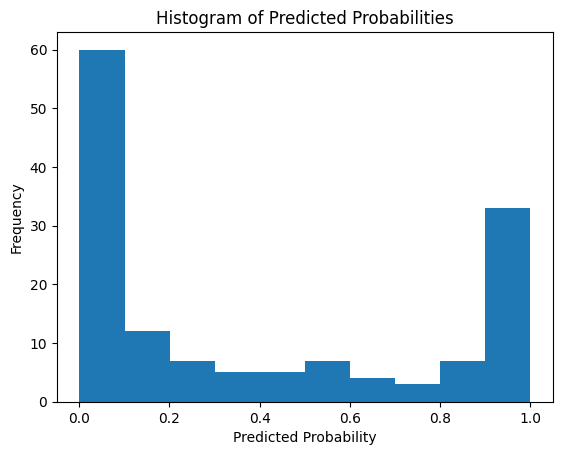

In [43]:
# Ottenere i valori della funzione di decisione per il set di addestramento
decision_values_train = svc.decision_function(X_train2)

# we now create a new model using the predicted probabilites as input in order to calibrate original probabilites predicted
lr_model = LogisticRegression()
lr_model.fit(decision_values_train.reshape(-1,1), y_train2)

# Ottenere i valori della funzione di decisione per il set di test
decision_values_test = svc.decision_function(X_test)

# Calcolare le probabilità previste utilizzando il modello di regressione logistica
pred_probs = lr_model.predict_proba(decision_values_test.reshape(-1, 1))[:, 1]
    
# plotting
plt.hist(pred_probs, bins=10)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

### Kernel SVC

In [44]:
from sklearn.svm import SVC

In [45]:
ksvc = SVC(kernel='rbf', C=30, gamma='scale')
ksvc = svc.fit(X_train2, y_train2)
y_pred = ksvc.predict(X_test2)
accuracy = ksvc.score(X_test2, y_test2)
print(accuracy)

0.8811188811188811


AUC-ROC CURVE FOR ALL MODELS

In [46]:
# Modello Decision Tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train2, y_train2)

# Modello Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train2, y_train2)

# Modello KNN
knn = KNeighborsClassifier()
knn.fit(X_train2, y_train2)

# Predire le probabilità per il test set
y_prob_decision_tree = decision_tree.predict_proba(X_test2)[:, 1]
y_prob_random_forest = random_forest.predict_proba(X_test2)[:, 1]
y_prob_knn = knn.predict_proba(X_test2)[:, 1]
y_prob_svc = svc.predict_proba(X_test2)[:, 1]
y_prob_ksvc = ksvc.predict_proba(X_test2)[:, 1]

# Calcolare i tassi di veri positivi e falsi positivi
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test2, y_prob_decision_tree)
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test2, y_prob_random_forest)
fpr_knn, tpr_knn, _ = roc_curve(y_test2, y_prob_knn)
fpr_svc, tpr_svc, _ = roc_curve(y_test2, y_prob_svc)
fpr_kernel_svc, tpr_kernel_svc, _ = roc_curve(y_test2, y_prob_ksvc)

# Calcolare l'AUC
auc_decision_tree = roc_auc_score(y_test2, y_prob_decision_tree)
auc_random_forest = roc_auc_score(y_test2, y_prob_random_forest)
auc_knn = roc_auc_score(y_test2, y_prob_knn)
auc_svc = roc_auc_score(y_test2, y_prob_svc)
auc_kernel_svc = roc_auc_score(y_test2, y_prob_ksvc)

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

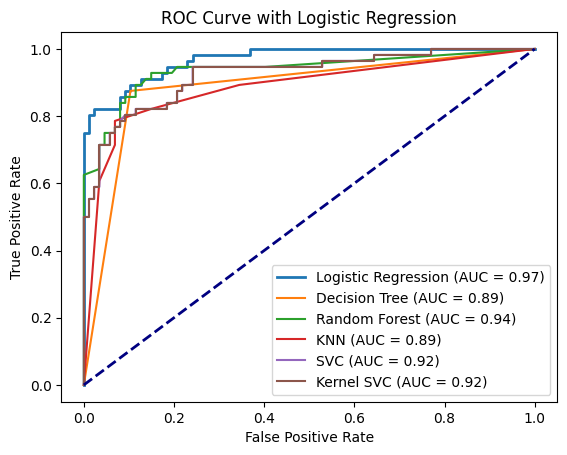

In [ ]:
# Visualizzare la curva ROC
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {auc_decision_tree:.2f})')
plt.plot(fpr_random_forest, tpr_random_forest, label=f'Random Forest (AUC = {auc_random_forest:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc_svc:.2f})')
plt.plot(fpr_kernel_svc, tpr_kernel_svc, label=f'Kernel SVC (AUC = {auc_kernel_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Logistic Regression')
plt.legend(loc="lower right")
plt.show()